# Test LARMIP and LARMIP-2

In [15]:
import sys
sys.path.append('../code')
import importlib
import glob

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import display

import func_misc as misc
import func_ant as ant

In [30]:
importlib.reload(ant)

<module 'func_ant' from '../code/func_ant.py'>

In [3]:
def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    '''Easily compute the distribution, plot a histogram and table of percentile 
    values'''
    nbin = int(hi - lo) 
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in + ' for '+SCE)
    plt.show()
    
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    print("### Distribution ###")
    display(perc)

In [37]:
data_dir = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
DIR_T = data_dir+'Data_AR5/Tglobal/'
start_date2 = 2006

LowPass = False
SCE = 'rcp45'
GAM = 1
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]

N = int(1e5)
NormD  = np.random.normal(0, 1, N)
TEMPf = 'AR5' # 'all', 'AR5'

if TEMPf == 'all':
    path = DIR_T+'global_tas_Amon_*_'+SCE+'_r1i1p1.dat'
    if nl.INFO:
        print(path)
    files     = glob.glob(path)
elif TEMPf == 'AR5':
    files = misc.temp_path_AR5(MOD, DIR_T, SCE)
else:
    print('Option TEMPf: ' + nl.TEMPf + ' is not supported')
    
temp_files = files
UnifDd = np.random.uniform(0, 1, N)

In [38]:
%%time
X_ant = ant.ant_dyn_larmip_t(SCE, MOD, start_date2, GAM, NormD, UnifDd, data_dir, files, 'LARMIP', LowPass)

CPU times: user 15 s, sys: 5.3 s, total: 20.3 s
Wall time: 21.9 s


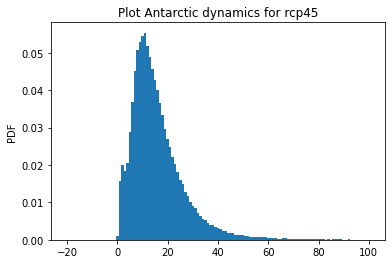

### Distribution ###


,values
percentiles,
1.0,1.0
5.0,3.0
10.0,5.0
17.0,7.0
20.0,7.0
50.0,13.0
80.0,22.0
83.0,23.0
90.0,28.0


In [39]:
comp_plot_dist(X_ant[:,-1], -20.5, 100.5, 'Plot Antarctic dynamics', SCE)

In [40]:
X_ant_m = np.mean(X_ant,0)

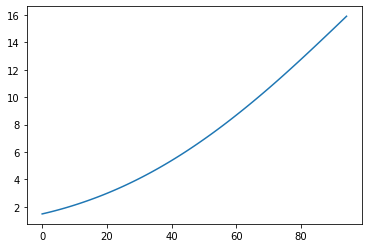

In [41]:
plt.plot(X_ant_m)

Expected value seems to behave in the same way as the NCL code

Why is there a big jump in the distribution in 0?
Need some further investigations.

Probably from the fact that the coefficients relating GMST and subsurface temperature at the ice shelves are forced to be positive.

### Continue work with LARMIP2 implementation

In [32]:
# Read the text files
bm = 'BM08' # basal melt m.y-1. BM02, BM04, BM08, BM16 available. 
            # BM08 is used in Levermann et al. 2020.
reg = 'R5' # R0 to R5 and SU (sum of all regions)
# R0 has less members than the other regions...
path = f'{data_dir}LRF_Lev20/RFunctions/RF_*_{bm}_{reg}.dat'
print(path)

files = glob.glob(path)
files

/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_*_BM08_R5.dat


['/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_PISM_DMI_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_GRIS_LSC_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_PISM_AWI_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_BISI_LBL_1KM_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_UA_UNN_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_PS3D_PSU_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_SICO_UHO_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_PISM_VUW_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_FETI_VUB_BM08_R5.dat',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/LRF_Lev20/RFunctions/RF_I

In [31]:
len(files)

17

Next steps:
- Use the LARMIP2 LRF (try to use the same code/function for both LARMIP and LARMIP2 cases)
- Use CMIP6 instead of CMIP5 temperature
- Compare time series to coefficients
- Compute the coefficients for CMIP6
- Improve computational efficiency of the method
- Where is the script that includes a positive feedback between the freshwater and mass loss?